In [691]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Just Varying the number of observations made

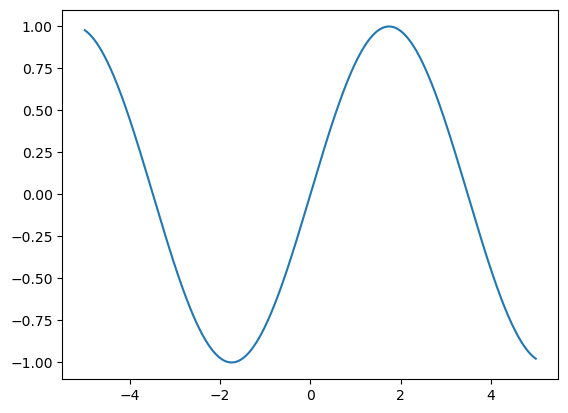

In [693]:
# The true function 
def f(x):
    return np.sin(0.9*x)

x = np.linspace(-5,5,1000)

plt.plot(x,f(x))
plt.show()

In [695]:
def Kernel(a,b):
    # we take len(a) = len(b)
    n= len(a)
    q= len(b)
    sqrdist = np.zeros((n,q))
    for j in range(0,n):
        for i in range(0,q):
           sqrdist[j,i] = (a[j]-b[i])**2 
    return np.exp(-1/2*(sqrdist))

In [697]:
# # Test points
# nobs = 4
# x = np.linspace(0,5,nobs)
# y = f(x)
# ntest = 1000
# Xtest = np.linspace(0,5,ntest)
# # sigma = noise level
# sigma = 0.05
# #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
# A = Kernel(x,x)+sigma**2*np.identity(nobs)**2
# ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
# Ainv =np.linalg.inv(A)
# fstar = Kernel(Xtest,x)@Ainv@y
# varf = Kernel(Xtest,Xtest)-Kernel(Xtest,x)@Ainv@Kernel(x,Xtest)
# varfxtest = varf.diagonal()
# plt.scatter(x,f(x),marker = "*",s=100,color='black',label='test points')
# plt.plot(Xtest,fstar,'r--',label="mean")
# plt.plot(Xtest,fstar+2*np.sqrt(varfxtest),color = 'black',label = "+-2std")
# plt.plot(Xtest,fstar-2*np.sqrt(varfxtest),color = 'black')
# plt.plot(Xtest,f(Xtest),color='blue',label='true')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.show()

In [699]:
def GPR(Nobs,Ntest):
    x = np.linspace(0,5,Nobs)
    y = f(x)
    Xtest = np.linspace(0,5,Ntest)
    # sigma = noise level
    sigma = 0.05
    #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
    A = Kernel(x,x)+sigma**2*np.identity(Nobs)**2
    ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
    Ainv =np.linalg.inv(A)
    fstar = Kernel(Xtest,x)@Ainv@y
    varf = Kernel(Xtest,Xtest)-Kernel(Xtest,x)@Ainv@Kernel(x,Xtest)
    varfxtest = varf.diagonal()
    plt.scatter(x,f(x),marker = "*",s=100,color='black',label='test points')
    plt.plot(Xtest,fstar,'r--',label="mean")
    plt.plot(Xtest,fstar+2*np.sqrt(varfxtest),color = 'black',label = "+-2std")
    plt.plot(Xtest,fstar-2*np.sqrt(varfxtest),color = 'black')
    plt.plot(Xtest,f(Xtest),color='blue',label='true')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

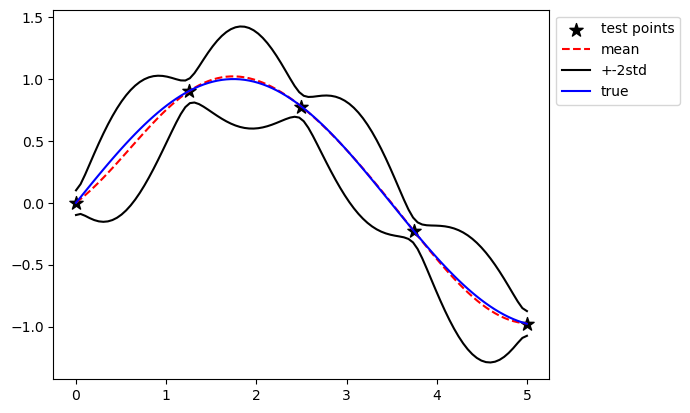

In [701]:
GPR(5,100)

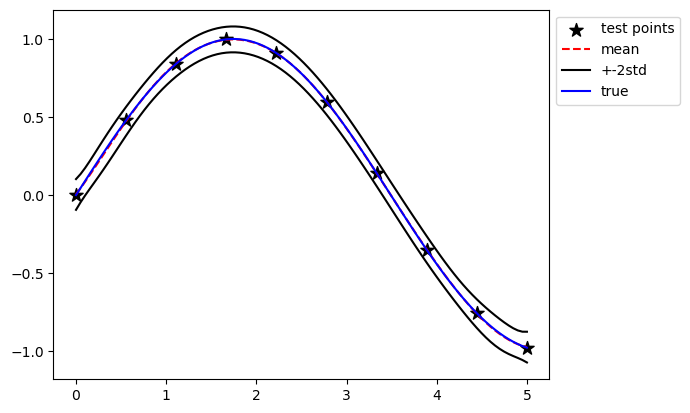

In [703]:
GPR(10,100)

In [705]:
def GPR(Nobs,Ntest):
    x = np.linspace(0,5,Nobs)
    y = f(x)
    Xtest = np.linspace(0,5,Ntest)
    # sigma = noise level
    sigma = 0.05
    #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
    A = Kernel(x,x)+sigma**2*np.identity(Nobs)**2
    ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
    Ainv =np.linalg.inv(A)
    fstar = Kernel(Xtest,x)@Ainv@y
    varf = Kernel(Xtest,Xtest)-Kernel(Xtest,x)@Ainv@Kernel(x,Xtest)
    varfxtest = varf.diagonal()
    std=np.sqrt(varfxtest)
    return Xtest,fstar,std


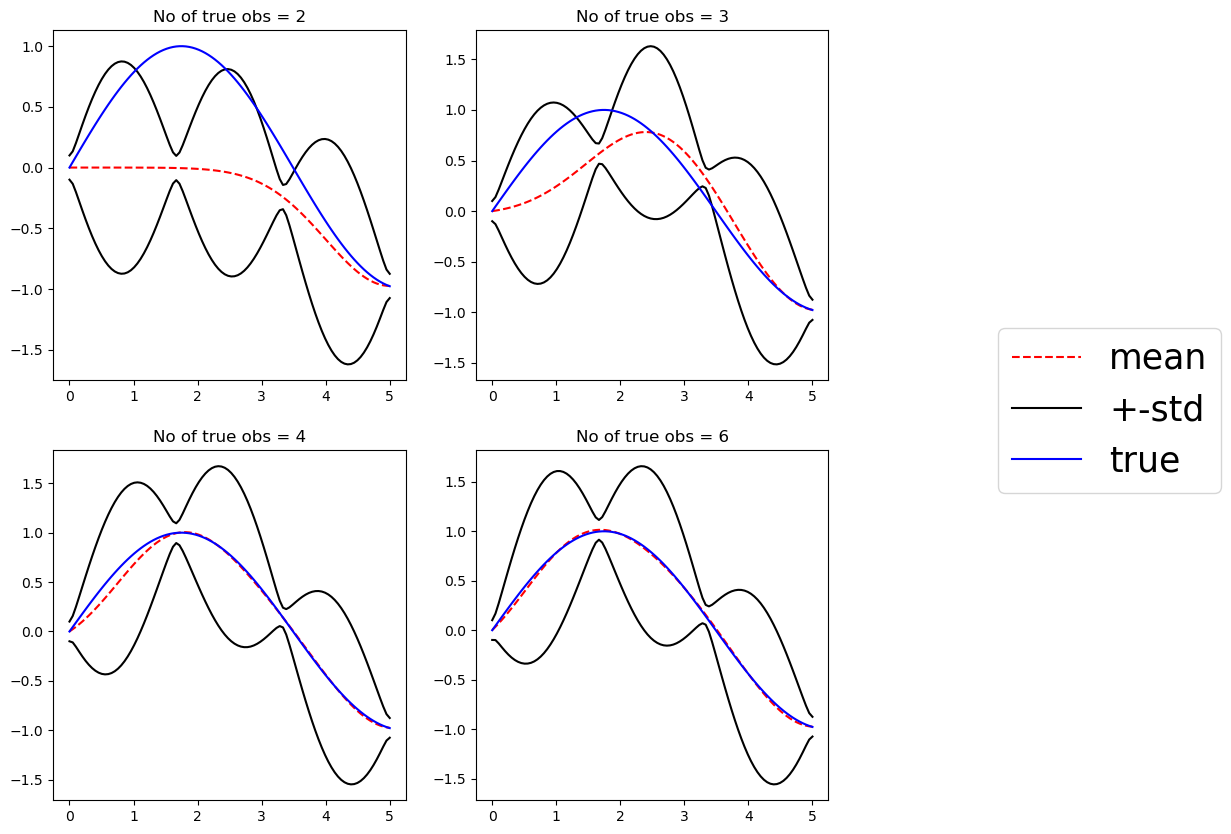

In [707]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
obs=np.array([2,3,4,6])
n=0
axs[0,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1],'r--',label="mean")
axs[0,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]+2*GPR(4,100)[2],color='black',label="+-std")
axs[0,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]-2*GPR(4,100)[2],color='black')
axs[0,0].plot(GPR(obs[n],100)[0],f(GPR(obs[n],100)[0]),color='blue',label='true')
axs[0,0].set_title("No of true obs = %.0f"%obs[n])
n=1
axs[0,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1],'r--')
axs[0,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]+2*GPR(4,100)[2],color='black')
axs[0,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]-2*GPR(4,100)[2],color='black')
axs[0,1].plot(GPR(obs[n],100)[0],f(GPR(obs[n],100)[0]),color='blue')
axs[0,1].set_title("No of true obs = %.0f"%obs[n])
n=2
axs[1,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1],'r--')
axs[1,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]+2*GPR(4,100)[2],color='black')
axs[1,0].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]-2*GPR(4,100)[2],color='black')
axs[1,0].plot(GPR(obs[n],100)[0],f(GPR(obs[n],100)[0]),color='blue')
axs[1,0].set_title("No of true obs = %.0f"%obs[n])
n=3
axs[1,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1],'r--')
axs[1,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]+2*GPR(4,100)[2],color='black')
axs[1,1].plot(GPR(obs[n],100)[0],GPR(obs[n],100)[1]-2*GPR(4,100)[2],color='black')
axs[1,1].plot(GPR(obs[n],100)[0],f(GPR(obs[n],100)[0]),color='blue')
axs[1,1].set_title("No of true obs = %.0f"%obs[n])


fig.legend(handles, 
           labels, 
           loc='center left', 
           bbox_to_anchor=(1, 0.5),     # Positioning outside the plot
           prop={'size':25},           # Increase font size for bigger legend
           frameon=True,                # Add box around the legend
           borderaxespad=2) 


# Now adding in $\sigma$ and $l$

In [661]:
def Kernel(a,b,sigma,l):
    # we take len(a) = len(b)
    n= len(a)
    q= len(b)
    sqrdist = np.zeros((n,q))
    for j in range(0,n):
        for i in range(0,q):
           sqrdist[j,i] = (a[j]-b[i])**2 
    return sigma*np.exp(-1/(2*l)*(sqrdist))

In [663]:
def GPR(Nobs,Ntest,sigma,l):
    x = np.linspace(0,5,Nobs)
    y = f(x)
    Xtest = np.linspace(0,5,Ntest)
    # sigma = noise level
    noise = 0.05
    #L = np.linalg.cholesky(Kernel(x,x)+sigma**2*np.identity(n)**2)
    A = Kernel(x,x,sigma,l)+noise**2*np.identity(Nobs)**2
    ## This produces a matrix such that L*Lt = Kernel(x,x)+sigma**2*np.identity(n)**2
    Ainv =np.linalg.inv(A)
    fstar = Kernel(Xtest,x,sigma,l)@Ainv@y
    varf = Kernel(Xtest,Xtest,sigma,l)-Kernel(Xtest,x,sigma,l)@Ainv@Kernel(x,Xtest,sigma,l)
    varfxtest = varf.diagonal()
    std=np.sqrt(varfxtest)
    return Xtest,fstar,std

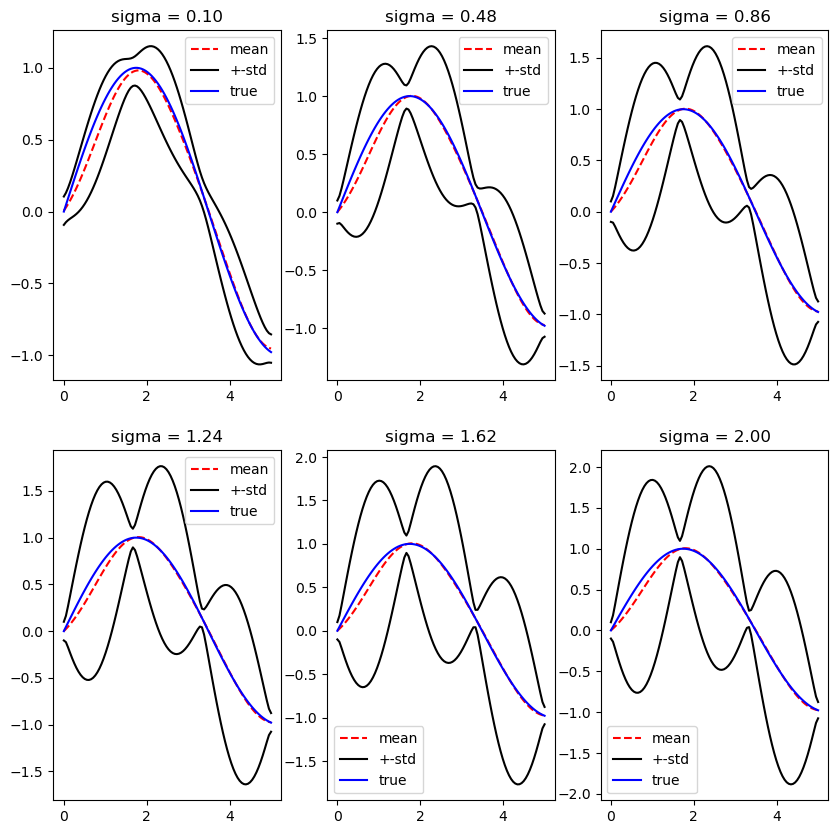

In [683]:
fig, axs = plt.subplots(2,3, figsize=(10, 10))
obs = np.array([4])
sigma_values = np.linspace(0.1,2,6)
l=1
# i=4
# axs[0,0].plot(GPR(obs[n],100,sigma[i],l)[0],GPR(obs[n],100,sigma[i],l)[1],'r--',label="mean")
# axs[0,0].plot(GPR(obs[n],100,sigma[i],l)[0],GPR(obs[n],100,sigma[i],l)[1]+2*GPR(4,100,sigma[i],l)[2],color='black',label="+-std")
# axs[0,0].plot(GPR(obs[n],100,sigma[i],l)[0],GPR(obs[n],100,sigma[i],l)[1]-2*GPR(4,100,sigma[i],l)[2],color='black')
# axs[0,0].plot(GPR(obs[n],100,sigma[i],l)[0],f(GPR(obs[n],100,sigma[i],l)[0]),color='blue',label='true')
# axs[0,0].set_title("sigma = %.0f"%sigma[i])
for row in range(2):
    for col in range(3):
        i = row * 3 + col  # Calculate the index based on row and column
        if i < len(sigma_values):  # Ensure we don't exceed the available sigma values
            ax = axs[row, col]
            ax.plot(GPR(obs[0], 100, sigma_values[i], l)[0], 
                    GPR(obs[0], 100, sigma_values[i], l)[1], 'r--', label="mean")
            ax.plot(GPR(obs[0], 100, sigma_values[i], l)[0], 
                    GPR(obs[0], 100, sigma_values[i], l)[1] + 2 * GPR(4, 100, sigma_values[i], l)[2], 
                    color='black', label="+-std")
            ax.plot(GPR(obs[0], 100, sigma_values[i], l)[0], 
                    GPR(obs[0], 100, sigma_values[i], l)[1] - 2 * GPR(4, 100, sigma_values[i], l)[2], 
                    color='black')
            ax.plot(GPR(obs[0], 100, sigma_values[i], l)[0], 
                    f(GPR(obs[0], 100, sigma_values[i], l)[0]), 
                    color='blue', label='true')
            ax.set_title(f"sigma = {sigma_values[i]:.2f}")  # Set title for each subplot
            ax.legend()


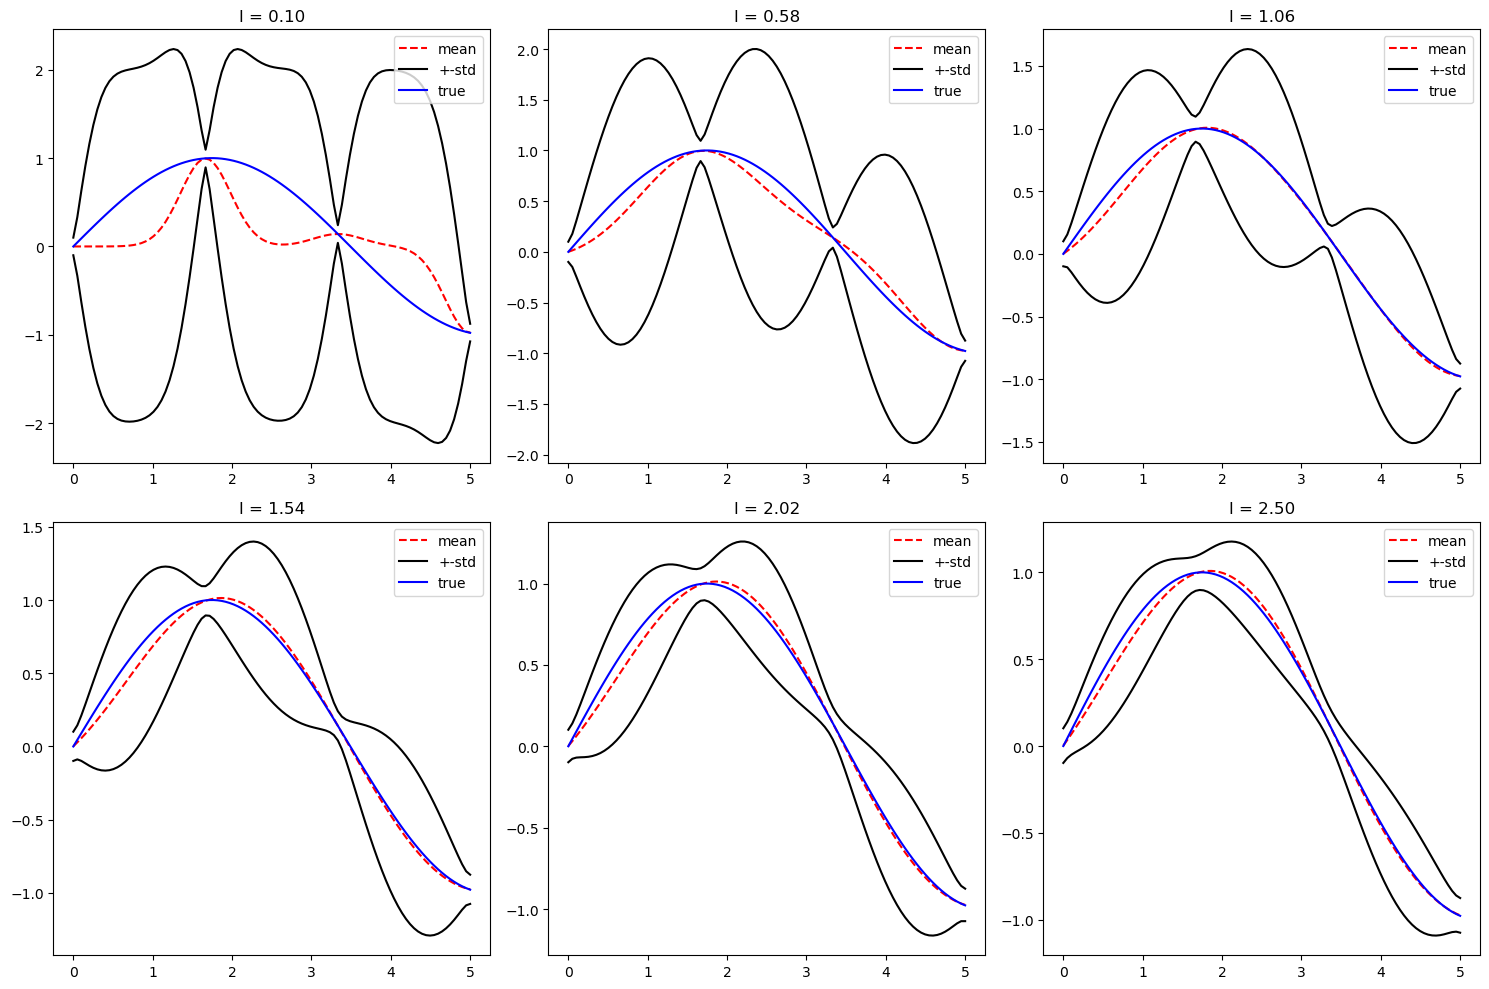

In [687]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust to accommodate all l values
obs = np.array([4])  # Number of observations
l_values = np.linspace(0.1, 2.5, 6)  # Varying l values from 0 to 1
sigma = 1  # Keep sigma constant at 1

# Loop through rows and columns to plot
for row in range(2):
    for col in range(3):
        i = row * 3 + col  # Calculate the index based on row and column
        if i < len(l_values):  # Ensure we don't exceed the available l values
            ax = axs[row, col]
            ax.plot(GPR(obs[0], 100, sigma, l_values[i])[0], 
                    GPR(obs[0], 100, sigma, l_values[i])[1], 'r--', label="mean")
            ax.plot(GPR(obs[0], 100, sigma, l_values[i])[0], 
                    GPR(obs[0], 100, sigma, l_values[i])[1] + 2 * GPR(4, 100, sigma, l_values[i])[2], 
                    color='black', label="+-std")
            ax.plot(GPR(obs[0], 100, sigma, l_values[i])[0], 
                    GPR(obs[0], 100, sigma, l_values[i])[1] - 2 * GPR(4, 100, sigma, l_values[i])[2], 
                    color='black')
            ax.plot(GPR(obs[0], 100, sigma, l_values[i])[0], 
                    f(GPR(obs[0], 100, sigma, l_values[i])[0]), 
                    color='blue', label='true')
            ax.set_title(f"l = {l_values[i]:.2f}")  # Set title for each subplot
            ax.legend()

# Adjust layout to fit all subplots and legends
plt.tight_layout()
plt.show()